In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("data.csv")

In [4]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [5]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

In [73]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [19]:
# Correct syntax
(df['Failure Type'] != 'No Failure').sum()

np.int64(348)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [30]:
df['Product ID'].value_counts(ascending=True)

Product ID
M24859    1
H39412    1
M24857    1
H39410    1
M24855    1
         ..
H29434    1
M14879    1
H29432    1
M14877    1
M14876    1
Name: count, Length: 10000, dtype: int64

In [31]:
df['Type'].value_counts(ascending=True)

Type
H    1003
M    2997
L    6000
Name: count, dtype: int64

In [32]:
df['Failure Type'].value_counts(ascending=True)

Failure Type
Random Failures               18
Tool Wear Failure             45
Overstrain Failure            78
Power Failure                 95
Heat Dissipation Failure     112
No Failure                  9652
Name: count, dtype: int64

Text(0.5, 0, 'Air temperature [k]')

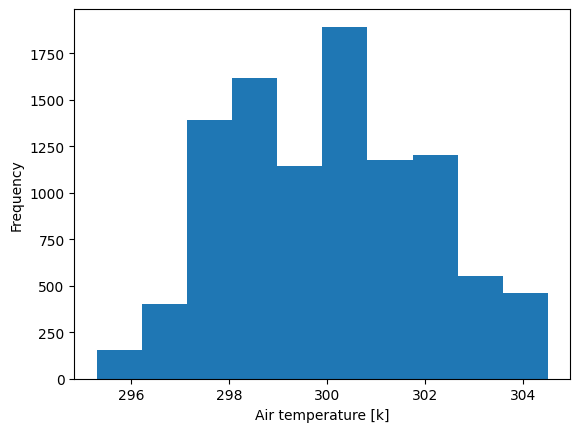

In [38]:
df['Air temperature [K]'].plot(kind='hist')
plt.xlabel('Air temperature [k]')

<Axes: ylabel='Frequency'>

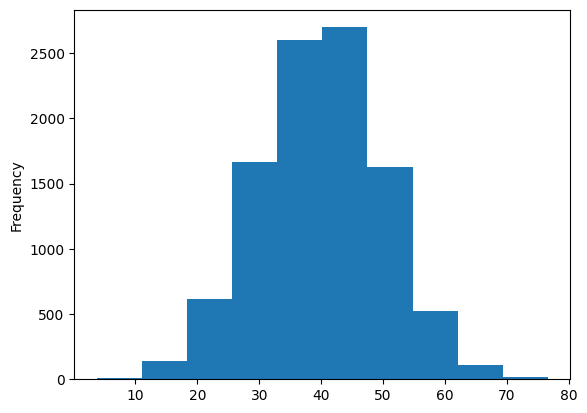

In [74]:
df['Torque [Nm]'].plot(kind='hist')

<Axes: ylabel='Frequency'>

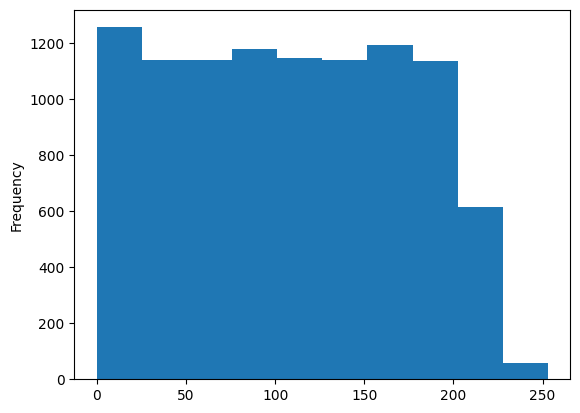

In [75]:
df['Tool wear [min]'].plot(kind='hist')

Text(0.5, 0, 'Process temperature [k]')

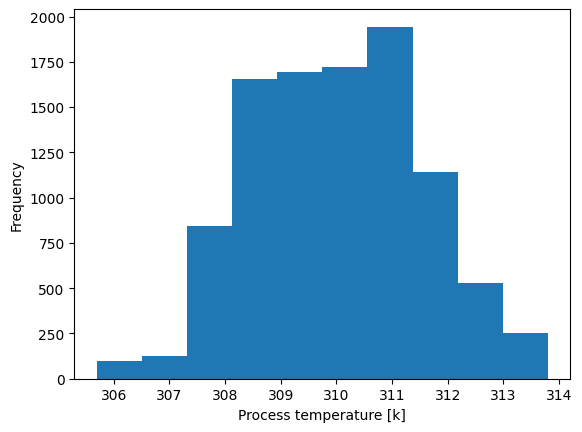

In [39]:
df['Process temperature [K]'].plot(kind='hist')
plt.xlabel('Process temperature [k]')

Text(0.5, 0, 'Rotational Speed')

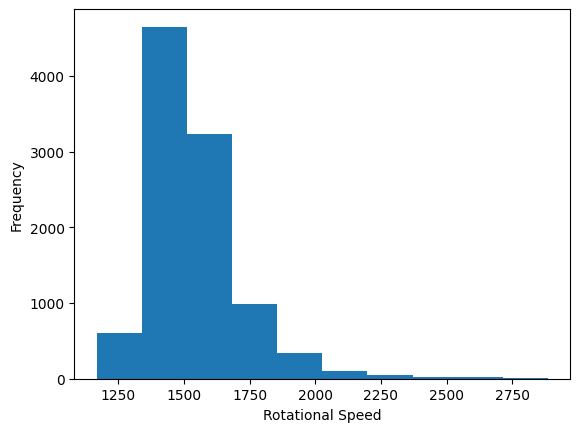

In [41]:
df['Rotational speed [rpm]'].plot(kind='hist')
plt.xlabel('Rotational Speed')

In [42]:
df['Target'].value_counts(ascending=True)

Target
1     339
0    9661
Name: count, dtype: int64

In [55]:
factors=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]']
pivot=df.pivot_table(
    index='Failure Type',
    values=factors,
    aggfunc='mean'
)

In [56]:
pivot

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm]
Failure Type,,,,
Heat Dissipation Failure,302.567857,310.799107,1337.964286,52.778571
No Failure,299.972855,309.994343,1540.324389,39.624316
Overstrain Failure,299.867949,310.051282,1354.243590,56.878205
Power Failure,300.075789,309.954737,1763.968421,48.514737
Random Failures,300.766667,310.755556,1489.444444,43.522222
Tool Wear Failure,300.288889,310.164444,1570.666667,37.226667


<Axes: ylabel='Failure Type'>

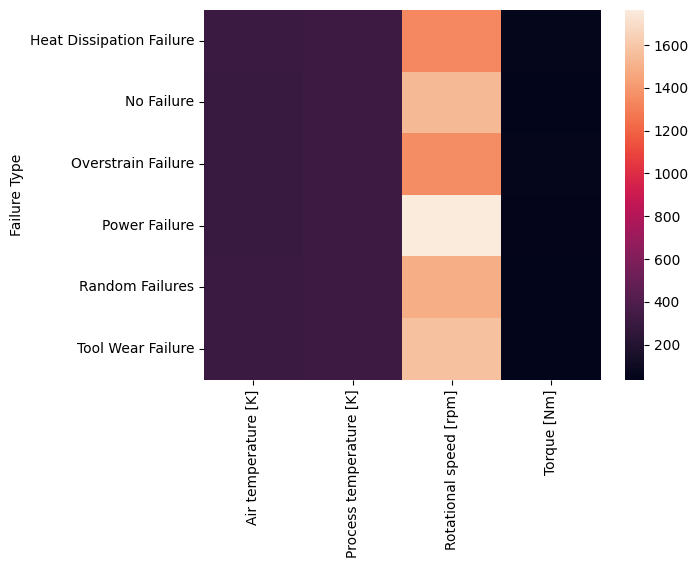

In [57]:
sns.heatmap(pivot)

In [58]:
numeric_df=df.select_dtypes(include=['float64','int64'])
corr_matrix=numeric_df.corr()

In [59]:
corr_matrix

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
UDI,1.000000,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Air temperature [K],0.117428,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556
Process temperature [K],0.324428,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotational speed [rpm],-0.006615,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque [Nm],0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Tool wear [min],-0.010702,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


In [77]:
df['Target'].value_counts(normalize=True)*100

Target
0    96.61
1     3.39
Name: proportion, dtype: float64

<Axes: >

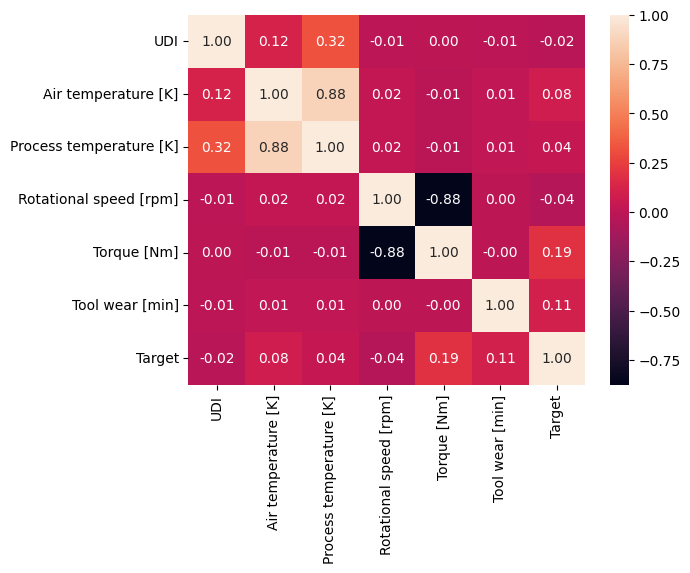

In [60]:
sns.heatmap(corr_matrix, annot=True,  fmt=".2f")

In [63]:
factors = ['Air temperature [K]', 'Process temperature [K]', 
           'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

df.groupby('Failure Type')[factors].mean().round(2)




,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Failure Type,,,,,
Heat Dissipation Failure,302.57,310.80,1337.96,52.78,107.34
No Failure,299.97,309.99,1540.32,39.62,106.68
Overstrain Failure,299.87,310.05,1354.24,56.88,208.22
Power Failure,300.08,309.95,1763.97,48.51,101.88
Random Failures,300.77,310.76,1489.44,43.52,119.89
Tool Wear Failure,300.29,310.16,1570.67,37.23,216.56


C:\Users\Hrishi\AppData\Local\Temp\ipykernel_9036\2851243658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Failure Type', y=col, data=df, ax=axes[i], palette='coolwarm')
C:\Users\Hrishi\AppData\Local\Temp\ipykernel_9036\2851243658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Failure Type', y=col, data=df, ax=axes[i], palette='coolwarm')
C:\Users\Hrishi\AppData\Local\Temp\ipykernel_9036\2851243658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Failure Type', y=col, data=df, ax=axes[i], palette='coolwarm')
C:\Users\H

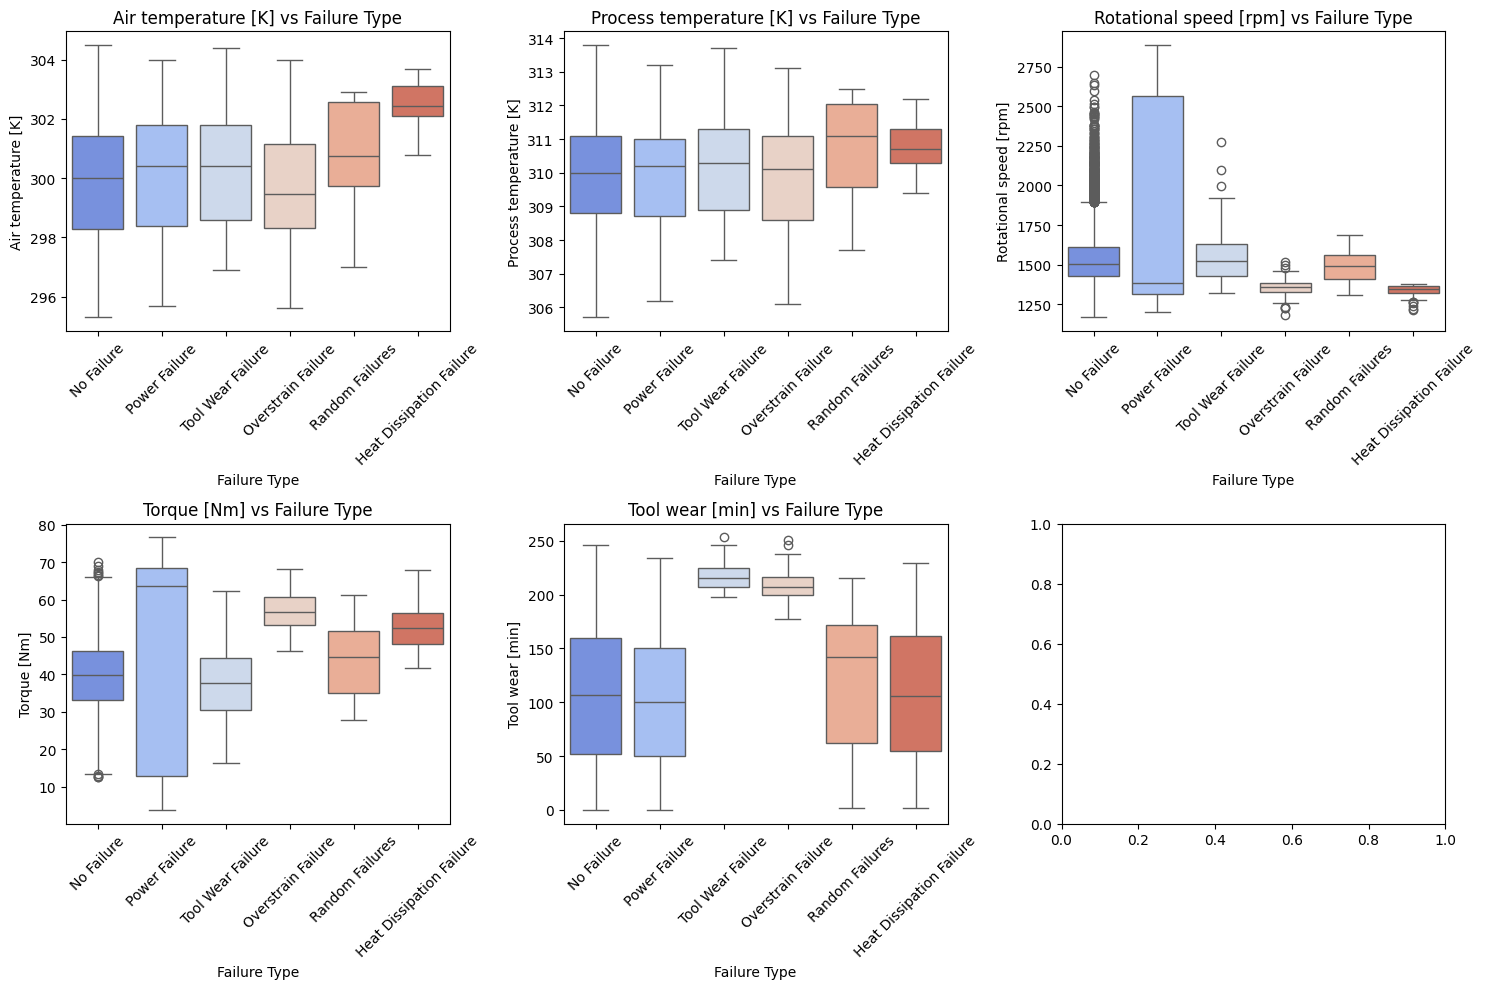

In [65]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
factors = ['Air temperature [K]', 'Process temperature [K]', 
           'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

for i, col in enumerate(factors):
    sns.boxplot(x='Failure Type', y=col, data=df, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{col} vs Failure Type')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [71]:
df.groupby('Type')['Failure Type'].value_counts(ascending=True)

Type  Failure Type            
H     Overstrain Failure             1
      Random Failures                4
      Power Failure                  5
      Tool Wear Failure              6
      Heat Dissipation Failure       8
      No Failure                   979
L     Random Failures               12
      Tool Wear Failure             25
      Power Failure                 59
      Overstrain Failure            73
      Heat Dissipation Failure      74
      No Failure                  5757
M     Random Failures                2
      Overstrain Failure             4
      Tool Wear Failure             14
      Heat Dissipation Failure      30
      Power Failure                 31
      No Failure                  2916
Name: count, dtype: int64

In [72]:
pd.crosstab(df['Type'], df['Failure Type'])


Failure Type,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Type,,,,,,
H,8,979,1,5,4,6
L,74,5757,73,59,12,25
M,30,2916,4,31,2,14


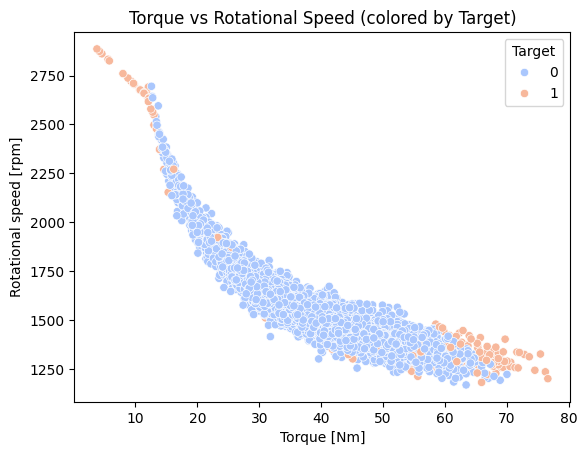

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=df,
    x='Torque [Nm]',
    y='Rotational speed [rpm]',
    hue='Target',
    palette='coolwarm'
)
plt.title('Torque vs Rotational Speed (colored by Target)')
plt.show()
